In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta, poisson

Question 1

In [2]:
data_import = pd.read_csv("http://data.un.org/_Docs/SYB/CSV/SYB64_246_202110_Population%20Growth,%20Fertility%20and%20Mortality%20Indicators.csv", encoding="latin-1", skiprows=1)
data_import.head(5) # Printed the head to get an overview of the dataset.

,Region/Country/Area,Unnamed: 1,Year,Series,Value,Footnotes,Source
0,1,"Total, all countries or areas",2010,Population annual rate of increase (percent),1.2,Data refers to a 5-year period preceding the r...,"United Nations Population Division, New York, ..."
1,1,"Total, all countries or areas",2010,Total fertility rate (children per women),2.6,Data refers to a 5-year period preceding the r...,"United Nations Population Division, New York, ..."
2,1,"Total, all countries or areas",2010,"Infant mortality for both sexes (per 1,000 liv...",41.0,Data refers to a 5-year period preceding the r...,"United Nations Statistics Division, New York, ..."
3,1,"Total, all countries or areas",2010,"Maternal mortality ratio (deaths per 100,000 p...",248,NaN,"World Health Organization (WHO), the United Na..."
4,1,"Total, all countries or areas",2010,Life expectancy at birth for both sexes (years),68.9,Data refers to a 5-year period preceding the r...,"United Nations Population Division, New York, ..."


Question 2

In [3]:
np.unique(data_import["Series"].values) # Printed a list of the types of series

array(['Infant mortality for both sexes (per 1,000 live births)',
       'Life expectancy at birth for both sexes (years)',
       'Life expectancy at birth for females (years)',
       'Life expectancy at birth for males (years)',
       'Maternal mortality ratio (deaths per 100,000 population)',
       'Population annual rate of increase (percent)',
       'Total fertility rate (children per women)'], dtype=object)

In [4]:
# By looking at the data, we see that all instances from 624 onwards are countries.

data = data_import.iloc[624:]
data.head(8) # Check

,Region/Country/Area,Unnamed: 1,Year,Series,Value,Footnotes,Source
624,4,Afghanistan,2010,Population annual rate of increase (percent),2.6,Data refers to a 5-year period preceding the r...,"United Nations Population Division, New York, ..."
625,4,Afghanistan,2010,Total fertility rate (children per women),6.5,Data refers to a 5-year period preceding the r...,"United Nations Population Division, New York, ..."
626,4,Afghanistan,2010,"Infant mortality for both sexes (per 1,000 liv...",72.2,Data refers to a 5-year period preceding the r...,"United Nations Statistics Division, New York, ..."
627,4,Afghanistan,2010,"Maternal mortality ratio (deaths per 100,000 p...",954,NaN,"World Health Organization (WHO), the United Na..."
628,4,Afghanistan,2010,Life expectancy at birth for both sexes (years),59.6,Data refers to a 5-year period preceding the r...,"United Nations Population Division, New York, ..."
629,4,Afghanistan,2010,Life expectancy at birth for males (years),58.3,Data refers to a 5-year period preceding the r...,"United Nations Population Division, New York, ..."
630,4,Afghanistan,2010,Life expectancy at birth for females (years),61.0,Data refers to a 5-year period preceding the r...,"United Nations Population Division, New York, ..."
631,4,Afghanistan,2015,Population annual rate of increase (percent),3.3,Data refers to a 5-year period preceding the r...,"United Nations Population Division, New York, ..."


In [5]:
#Check to see if the data only contains countries

np.unique(data.iloc[:,1].values) # We can verify from observation that it only contains countries.

array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Anguilla', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan',
       'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
       'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan',
       'Bolivia (Plurin. State of)', 'Bonaire, St. Eustatius & Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon',
       'Canada', 'Cayman Islands', 'Central African Republic', 'Chad',
       'Channel Islands', 'Chile', 'China', 'China, Hong Kong SAR',
       'China, Macao SAR', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', 'Croatia', 'Cuba', 'Curaçao', 'Cyprus', 'Czechia',
       'Côte d\x92Ivoire', "Dem. People's Rep. Korea",
       'Dem. Rep. of the Congo', 'Denmark', 'Djibouti', 'Dominica',
 

In [6]:
data.shape

(4275, 7)

In [7]:
# Now, we are going to select life expectency data for both sexes

life_expectancy_data = data.loc[data["Series"] == "Life expectancy at birth for both sexes (years)"]
life_expectancy_data.shape

(603, 7)

In [8]:
life_expectancy_data.head(5)

,Region/Country/Area,Unnamed: 1,Year,Series,Value,Footnotes,Source
628,4,Afghanistan,2010,Life expectancy at birth for both sexes (years),59.6,Data refers to a 5-year period preceding the r...,"United Nations Population Division, New York, ..."
635,4,Afghanistan,2015,Life expectancy at birth for both sexes (years),62.3,Data refers to a 5-year period preceding the r...,"United Nations Population Division, New York, ..."
642,4,Afghanistan,2020,Life expectancy at birth for both sexes (years),64.3,Data refers to a 5-year period preceding the r...,"United Nations Population Division, New York, ..."
649,8,Albania,2010,Life expectancy at birth for both sexes (years),75.6,Data refers to a 5-year period preceding the r...,"United Nations Population Division, New York, ..."
656,8,Albania,2015,Life expectancy at birth for both sexes (years),77.5,Data refers to a 5-year period preceding the r...,"United Nations Population Division, New York, ..."


In [9]:
# I will now clean the data by selecting only the Value. I will convert
# these from string values to floating points.
# data_cleaned is a numpy array containing all the desired data.

data_cleaned = life_expectancy_data.iloc[:,4].to_numpy(dtype="float")
data_cleaned

array([59.6, 62.3, 64.3, 75.6, 77.5, 78.4, 74.2, 75.5, 76.6, 52.7, 57.7,
       60.5, 75.5, 76.1, 76.8, 74.9, 75.7, 76.4, 72.7, 74. , 74.9, 74.7,
       75.4, 76.1, 81.5, 82.4, 83.2, 80.1, 81. , 81.4, 70.1, 71.6, 72.8,
       72. , 72.5, 73.7, 75.7, 76.4, 77.1, 68.8, 70.8, 72.2, 78.1, 78.6,
       79. , 69.3, 72.4, 74.5, 79.6, 80.5, 81.4, 70.7, 73.4, 74.4, 58.6,
       59.9, 61.3, 67. , 69.4, 71.3, 66.6, 69.3, 71.1, 75.5, 76.5, 77.2,
       55.9, 64.4, 69.1, 72.8, 74.3, 75.6, 74.4, 75. , 75.7, 73.1, 74.3,
       74.8, 55.3, 58.7, 60.9, 55.3, 58.9, 61. , 70.6, 71.5, 72.7, 65.1,
       67.6, 69.4, 54. , 56.3, 58.8, 80.8, 81.8, 82.2, 46. , 48.9, 52.7,
       49.5, 52.3, 53.8, 80.9, 82. , 82.8, 78.2, 79.3, 80. , 73.7, 75.1,
       76.6, 82.4, 83.4, 84.6, 82.1, 83.3, 84. , 74.8, 76. , 77. , 60.9,
       62.8, 64. , 58.2, 61.7, 64.2, 78.4, 79.2, 80. , 51.4, 54.6, 57.2,
       76.1, 77.4, 78.2, 78.1, 78.5, 78.7, 76.1, 77.8, 78.6, 79. , 79.9,
       80.7, 77. , 78.2, 79.1, 68.4, 70.8, 72. , 55

In [10]:
# I have printed the the size of the dataset N.

N = data_cleaned.size
print(N)

603


Question 3

71.18275290215588 73.1


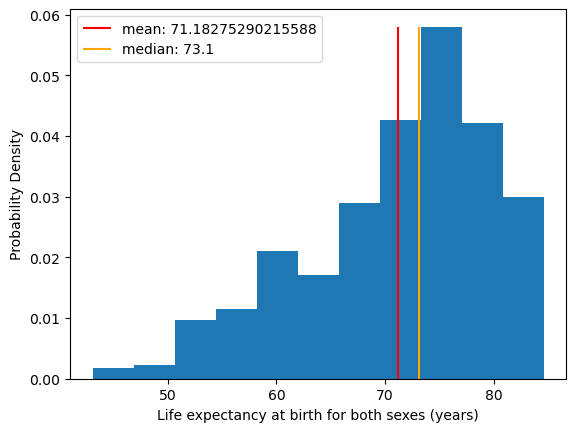

In [11]:
mean = np.mean(data_cleaned)
median = np.median(data_cleaned)
print(mean, median)

# Note that I have used Sturges' Formula for the number of bins.
# I have also plotted the density histogram so the total area is 1.

sturges_bins = int(np.ceil(np.log2(N))) + 1

hist = plt.hist(data_cleaned, bins=sturges_bins, density=True)

line_height = max(hist[0])

plt.vlines(mean,0,line_height, label=f"mean: {mean}", color="red")
plt.vlines(median,0,line_height, label=f"median: {median}", color="orange")
plt.xlabel("Life expectancy at birth for both sexes (years)")
plt.ylabel("Probability Density")
plt.legend()

We know that the mean is more susceptible to outliers and effected more by skewed distributions than the median. So, as the mean is a smaller value than the median, we can conclude that the distribution is negatively skewed.

Also, as the distribution is skewed, we will prefer to take the median as our measure of centrality.

Question 4

In [12]:
# Range Calculation
rng = data_cleaned.max() - data_cleaned.min()

# Interquartile Range Calculation
p = np.linspace(0,100,101)

percentile = np.percentile(data_cleaned, p) # Note that we have also computed the ppf.
iqr = percentile[75] - percentile[25]

# Standard Deviation Calculation
std = np.std(data_cleaned)

In [13]:
# Printing of range, IQR, and STD.
print(f"Range is {rng}")
print(f"Interquartile Range is {iqr}")
print(f"Standard Deviation is {std}")

Range is 41.49999999999999
Interquartile Range is 11.650000000000006
Standard Deviation is 8.546790600519302


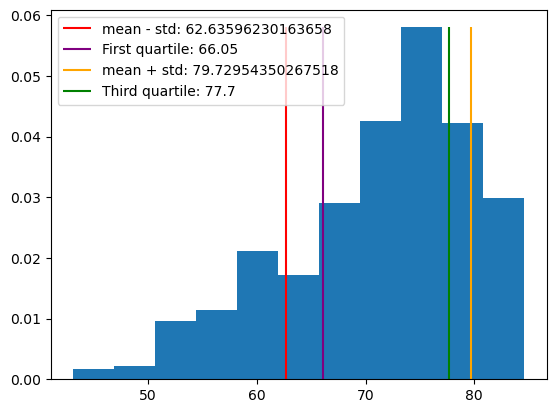

In [14]:
# Plot of Normalized Histogram with mean-std, mean+std, LQ, and UQ lines.

plt.hist(data_cleaned, bins=sturges_bins, density=True)
plt.vlines(mean - std,0,line_height, color="red", label=f"mean - std: {mean - std}")
plt.vlines(percentile[25],0,line_height, color="purple", label=f"First quartile: {percentile[25]}")
plt.vlines(mean + std,0,line_height, color="orange", label=f"mean + std: {mean + std}")
plt.vlines(percentile[75],0,line_height, color="green", label=f"Third quartile: {percentile[75]}")
plt.legend()

Question 5

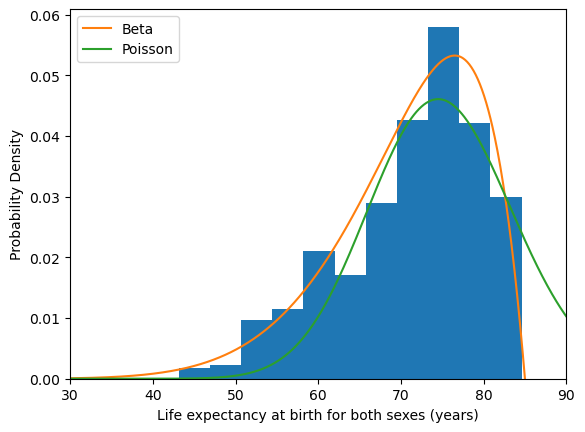

In [15]:
# I believe that the Beta and Poisson distribution are most likely so,
# I am testing them to see how they fit.

x_beta = np.linspace(0,1,1000)
x_poisson = np.linspace(0,100,1000)
histo_info = plt.hist(data_cleaned, bins=sturges_bins, density=True)
plt.plot(x_beta*85, beta.pdf(x_beta, 10, 2)/80, label="Beta") # Note that I have transformed the input
plt.plot(x_poisson, poisson.pmf(x_poisson, 75), label="Poisson")
plt.xlabel("Life expectancy at birth for both sexes (years)")
plt.ylabel("Probability Density")
plt.legend(loc=2)
plt.xlim(30,90)

bin_ranges = histo_info[1]   # This is the ranges of the bins that we will use. This will allow us to better compare the distributions using histogram.

Based on the histogram, I think that this data can be modeled using
a Beta distribution.

The data is negatively skewed, which can be represented by the beta distribution when the first parameter is larger than the second.

Although the beta distribution only has a support of x in [0,1], we can simply
perform a linear transformation of it to fit our data.

Although I initially compared the Beta and Poisson distribution, I arrived at the conclusion that the Beta distribution best modeled the data. The largest reason for discarding the Poisson distribution was that our dataset is clearly negatively skewed and the Poisson distribution is always positively skewed

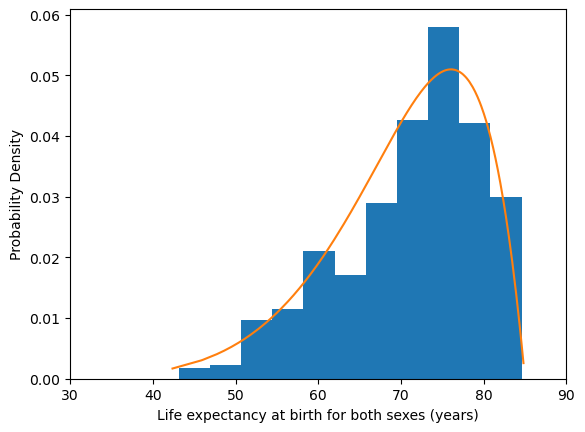

In [16]:
# Here I have sampled N values from the beta distribution. I have plotted its scatter graph with the histogram that I am trying to model.

beta_x = np.random.beta(9.5,2, N)
beta_x.sort()
plt.hist(data_cleaned, bins=bin_ranges, density=True)
plt.plot(beta_x*85, beta.pdf(beta_x, 9.5, 2)/80)
plt.xlabel("Life expectancy at birth for both sexes (years)")
plt.ylabel("Probability Density")
plt.xlim(30,90)
print()

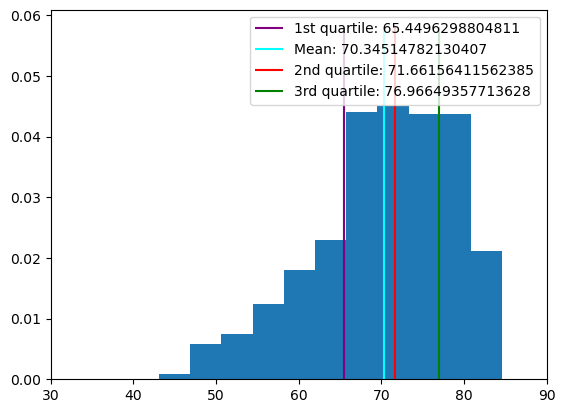

In [17]:
# This is the plot of the histogram of the data sampled from the Beta distribution with the Mean, first, second, and third quartile.

beta_x_t = 85*beta_x
beta_x_t_mean = np.mean(beta_x_t)
beta_x_t_std = np.std(beta_x_t)
beta_percentile = np.percentile(beta_x_t, p)

plt.hist(beta_x_t, bins=bin_ranges, density=True)
plt.vlines(beta_percentile[25],0,line_height, color="purple", label=f"1st quartile: {beta_percentile[25]}")
plt.vlines(beta_x_t_mean,0,line_height, color="cyan", label=f"Mean: {beta_x_t_mean}")
plt.vlines(beta_percentile[50],0,line_height, color="red", label=f"2nd quartile: {beta_percentile[50]}")
plt.vlines(beta_percentile[75],0,line_height, color="green", label=f"3rd quartile: {beta_percentile[75]}")
plt.xlim(30,90)
plt.legend()
print()